# Chapter 14: The Machine Learning Project

## Importing the libraries

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [46]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Importing the dataset

In [47]:
dataset = pd.read_excel('Genes_dataset.xlsx')
dataset.head()

,Gene_Symbol,Uniprot_ID,Polar,Neutral,Hydrophobicity,0-2.78,2.95-4.0,4.03-8.08,4.9-6.2,8.0-9.2,...,>1.1,1.1,0.1,High (9-65 g/100g),Medium (1.14-7.44 g/100g),Low (0.048-0.82,Very flexible,Moderately flexible,Less flexible,Target
0,CER1,O95813,33.75,35.00,31.25,32.50,46.25,21.25,31.25,30.00,...,8.75,47.50,43.75,11.25,47.50,41.25,22.50,32.50,45.00,1
1,LTA,P01374,18.75,46.25,35.00,42.50,37.50,20.00,35.00,40.00,...,10.00,55.00,35.00,12.50,52.50,35.00,13.75,28.75,57.50,1
2,TP53,P04637,32.50,42.50,25.00,52.50,33.75,13.75,25.00,42.50,...,5.00,33.75,61.25,10.00,40.00,50.00,23.75,30.00,46.25,1
3,TYR,P14679,23.75,40.00,36.25,48.75,30.00,21.25,37.50,37.50,...,18.75,48.75,32.50,21.25,48.75,30.00,15.00,45.00,40.00,1
4,ADRB2,P07550,21.25,37.50,41.25,40.00,42.50,17.50,42.50,33.75,...,11.25,48.75,40.00,15.00,60.00,25.00,13.75,33.75,52.50,1


In [48]:
dataset.shape

(658, 75)

dataset['Target'].value_counts()

In [52]:
dataset['Target'].value_counts()

1    329
0    329
Name: Target, dtype: int64

In [53]:
X = dataset.iloc[:,2:-1].values
y = dataset.iloc[:,-1].values

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

## PCA

In [55]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
PCs = sklearn_pca.fit_transform(X_norm)

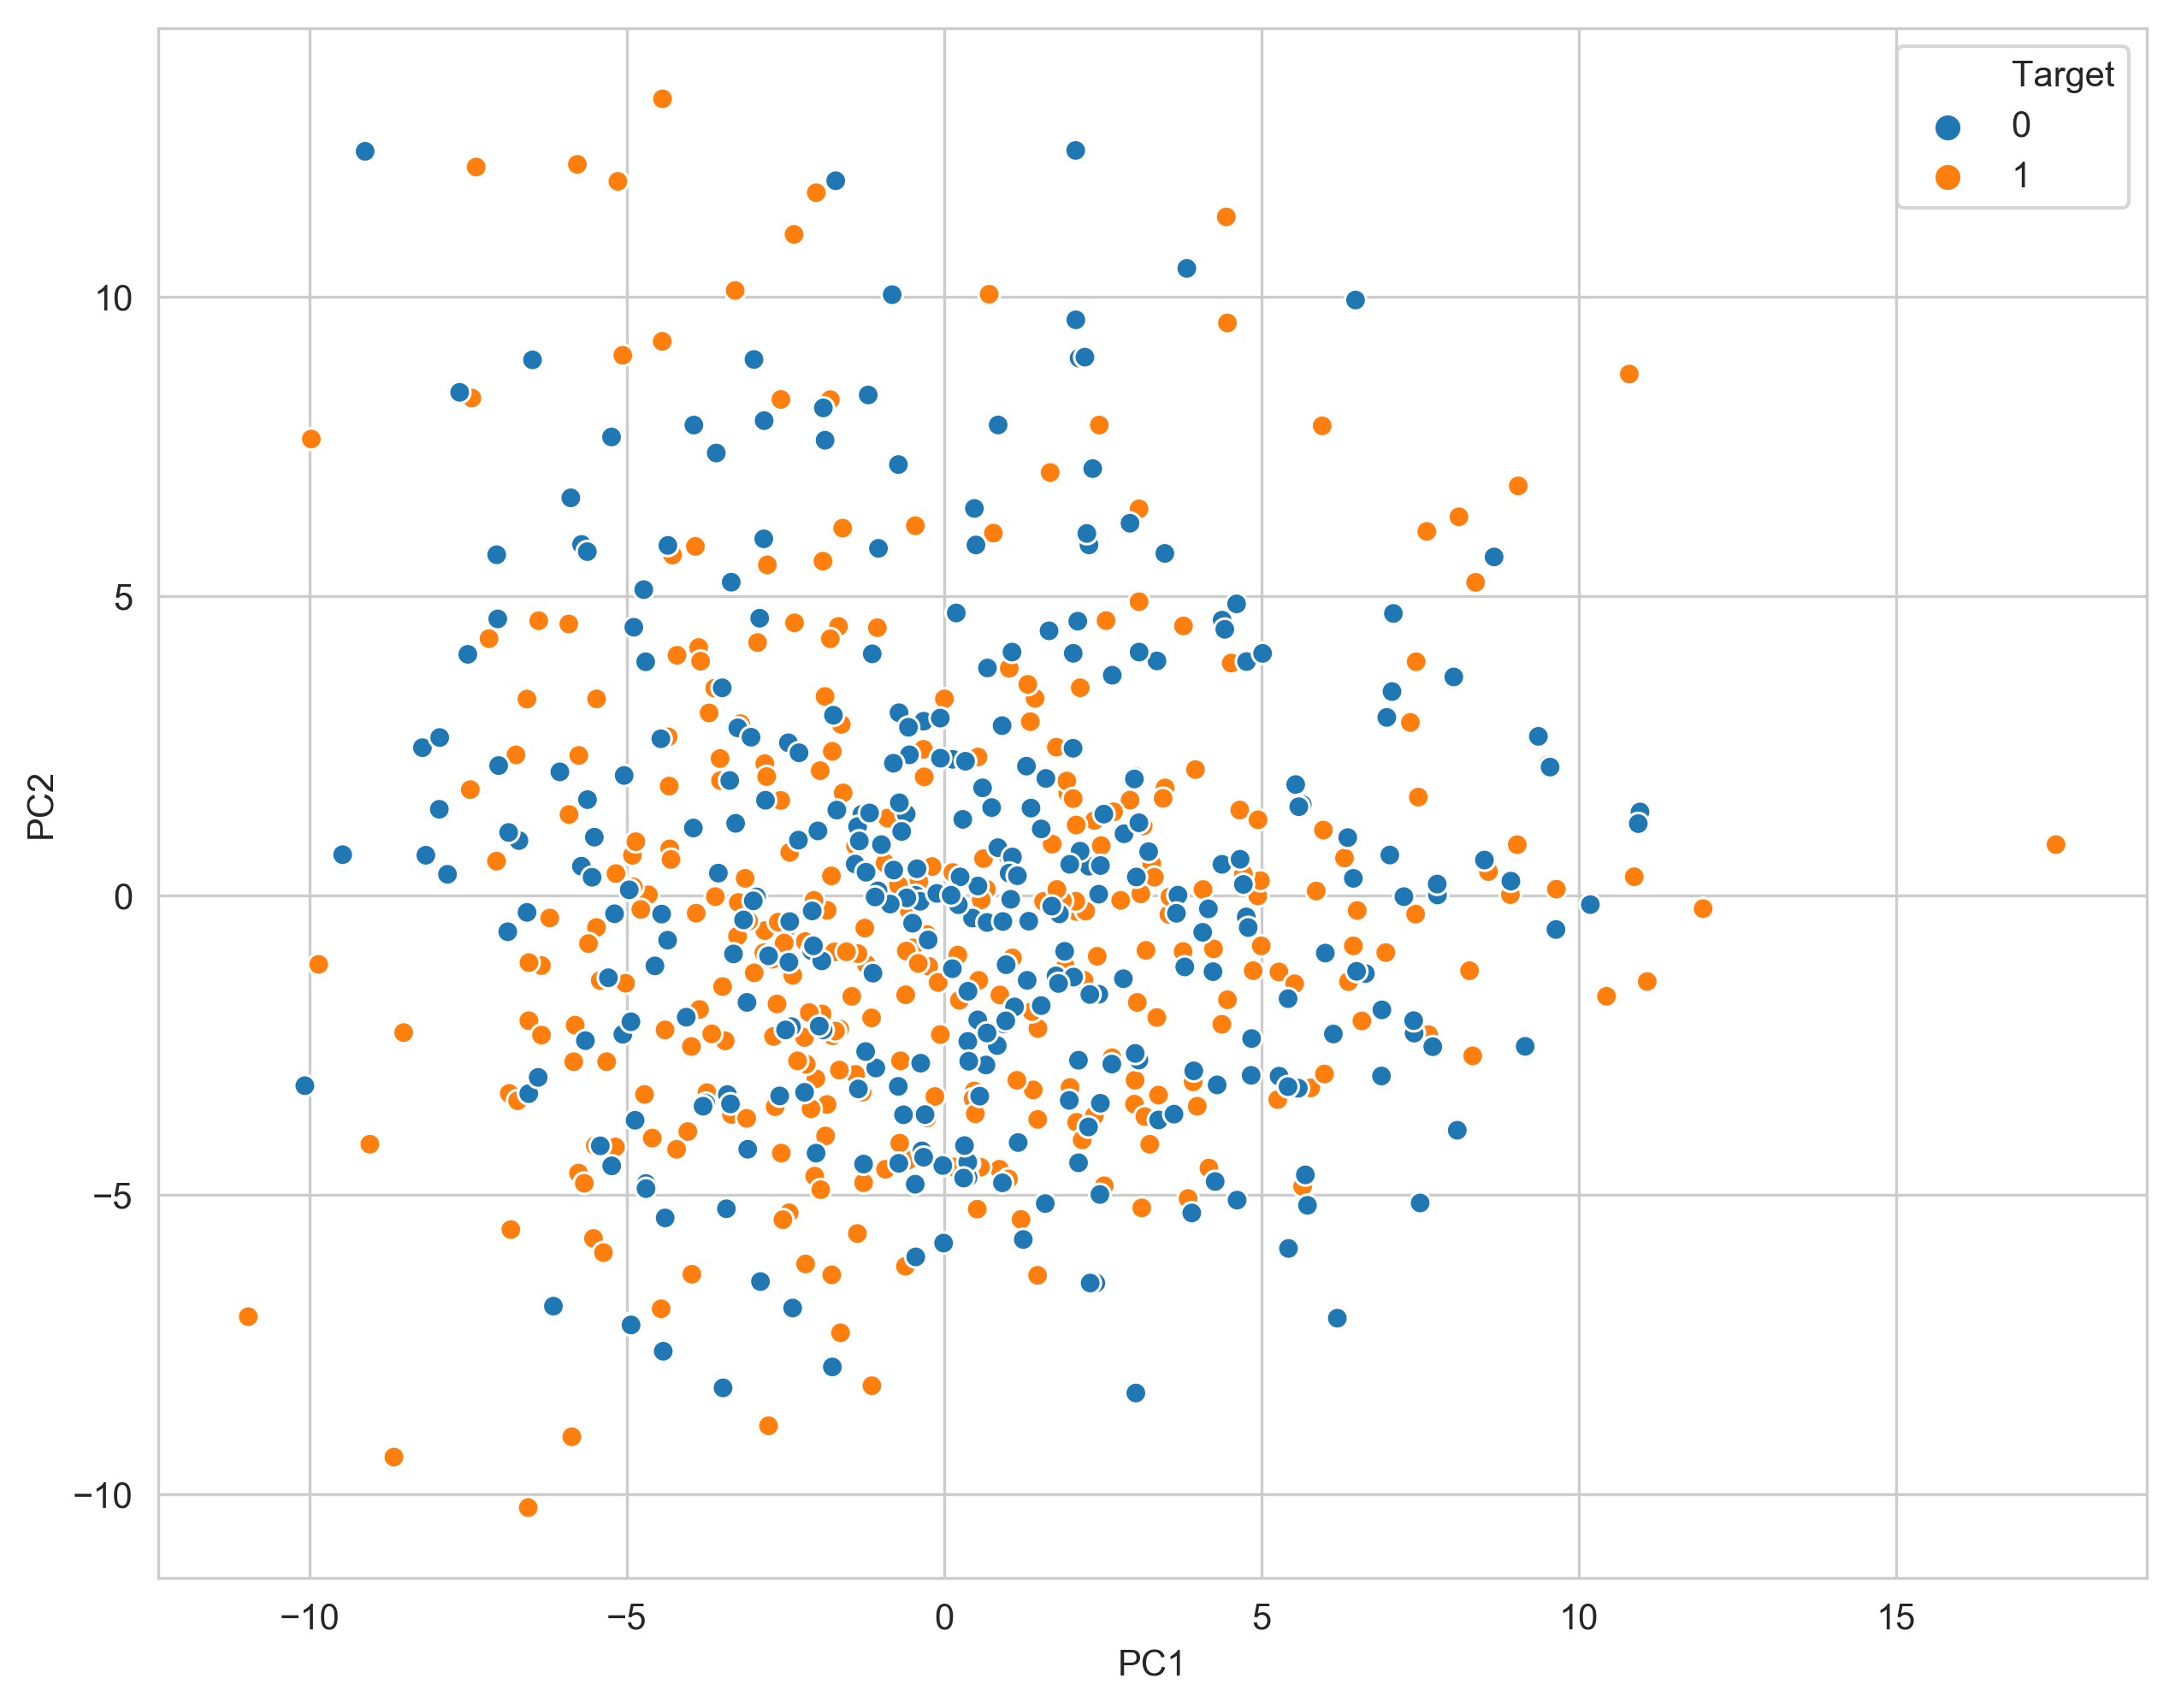

In [56]:
data_transform = pd.DataFrame(PCs,columns=['PC1','PC2'])
data_transform = pd.concat([data_transform,dataset.iloc[:,-1]],axis=1)
fig, axes = plt.subplots(figsize=(10,8))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = data_transform,hue='Target', cmap='grey')

## Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.20, random_state = 101)


## Training the Logistic Regression model and evaluation

In [58]:
from sklearn.linear_model import LogisticRegression
Logit_classifier = LogisticRegression(random_state = 0)
Logit_classifier.fit(X_train, y_train)

y_pred = Logit_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))


[[33 31]
 [22 46]]


              precision    recall  f1-score   support

           0       0.60      0.52      0.55        64
           1       0.60      0.68      0.63        68

    accuracy                           0.60       132
   macro avg       0.60      0.60      0.59       132
weighted avg       0.60      0.60      0.60       132



## Training the KNN model and evaluation

### Choosing K Value

Text(0, 0.5, 'Error Rate')

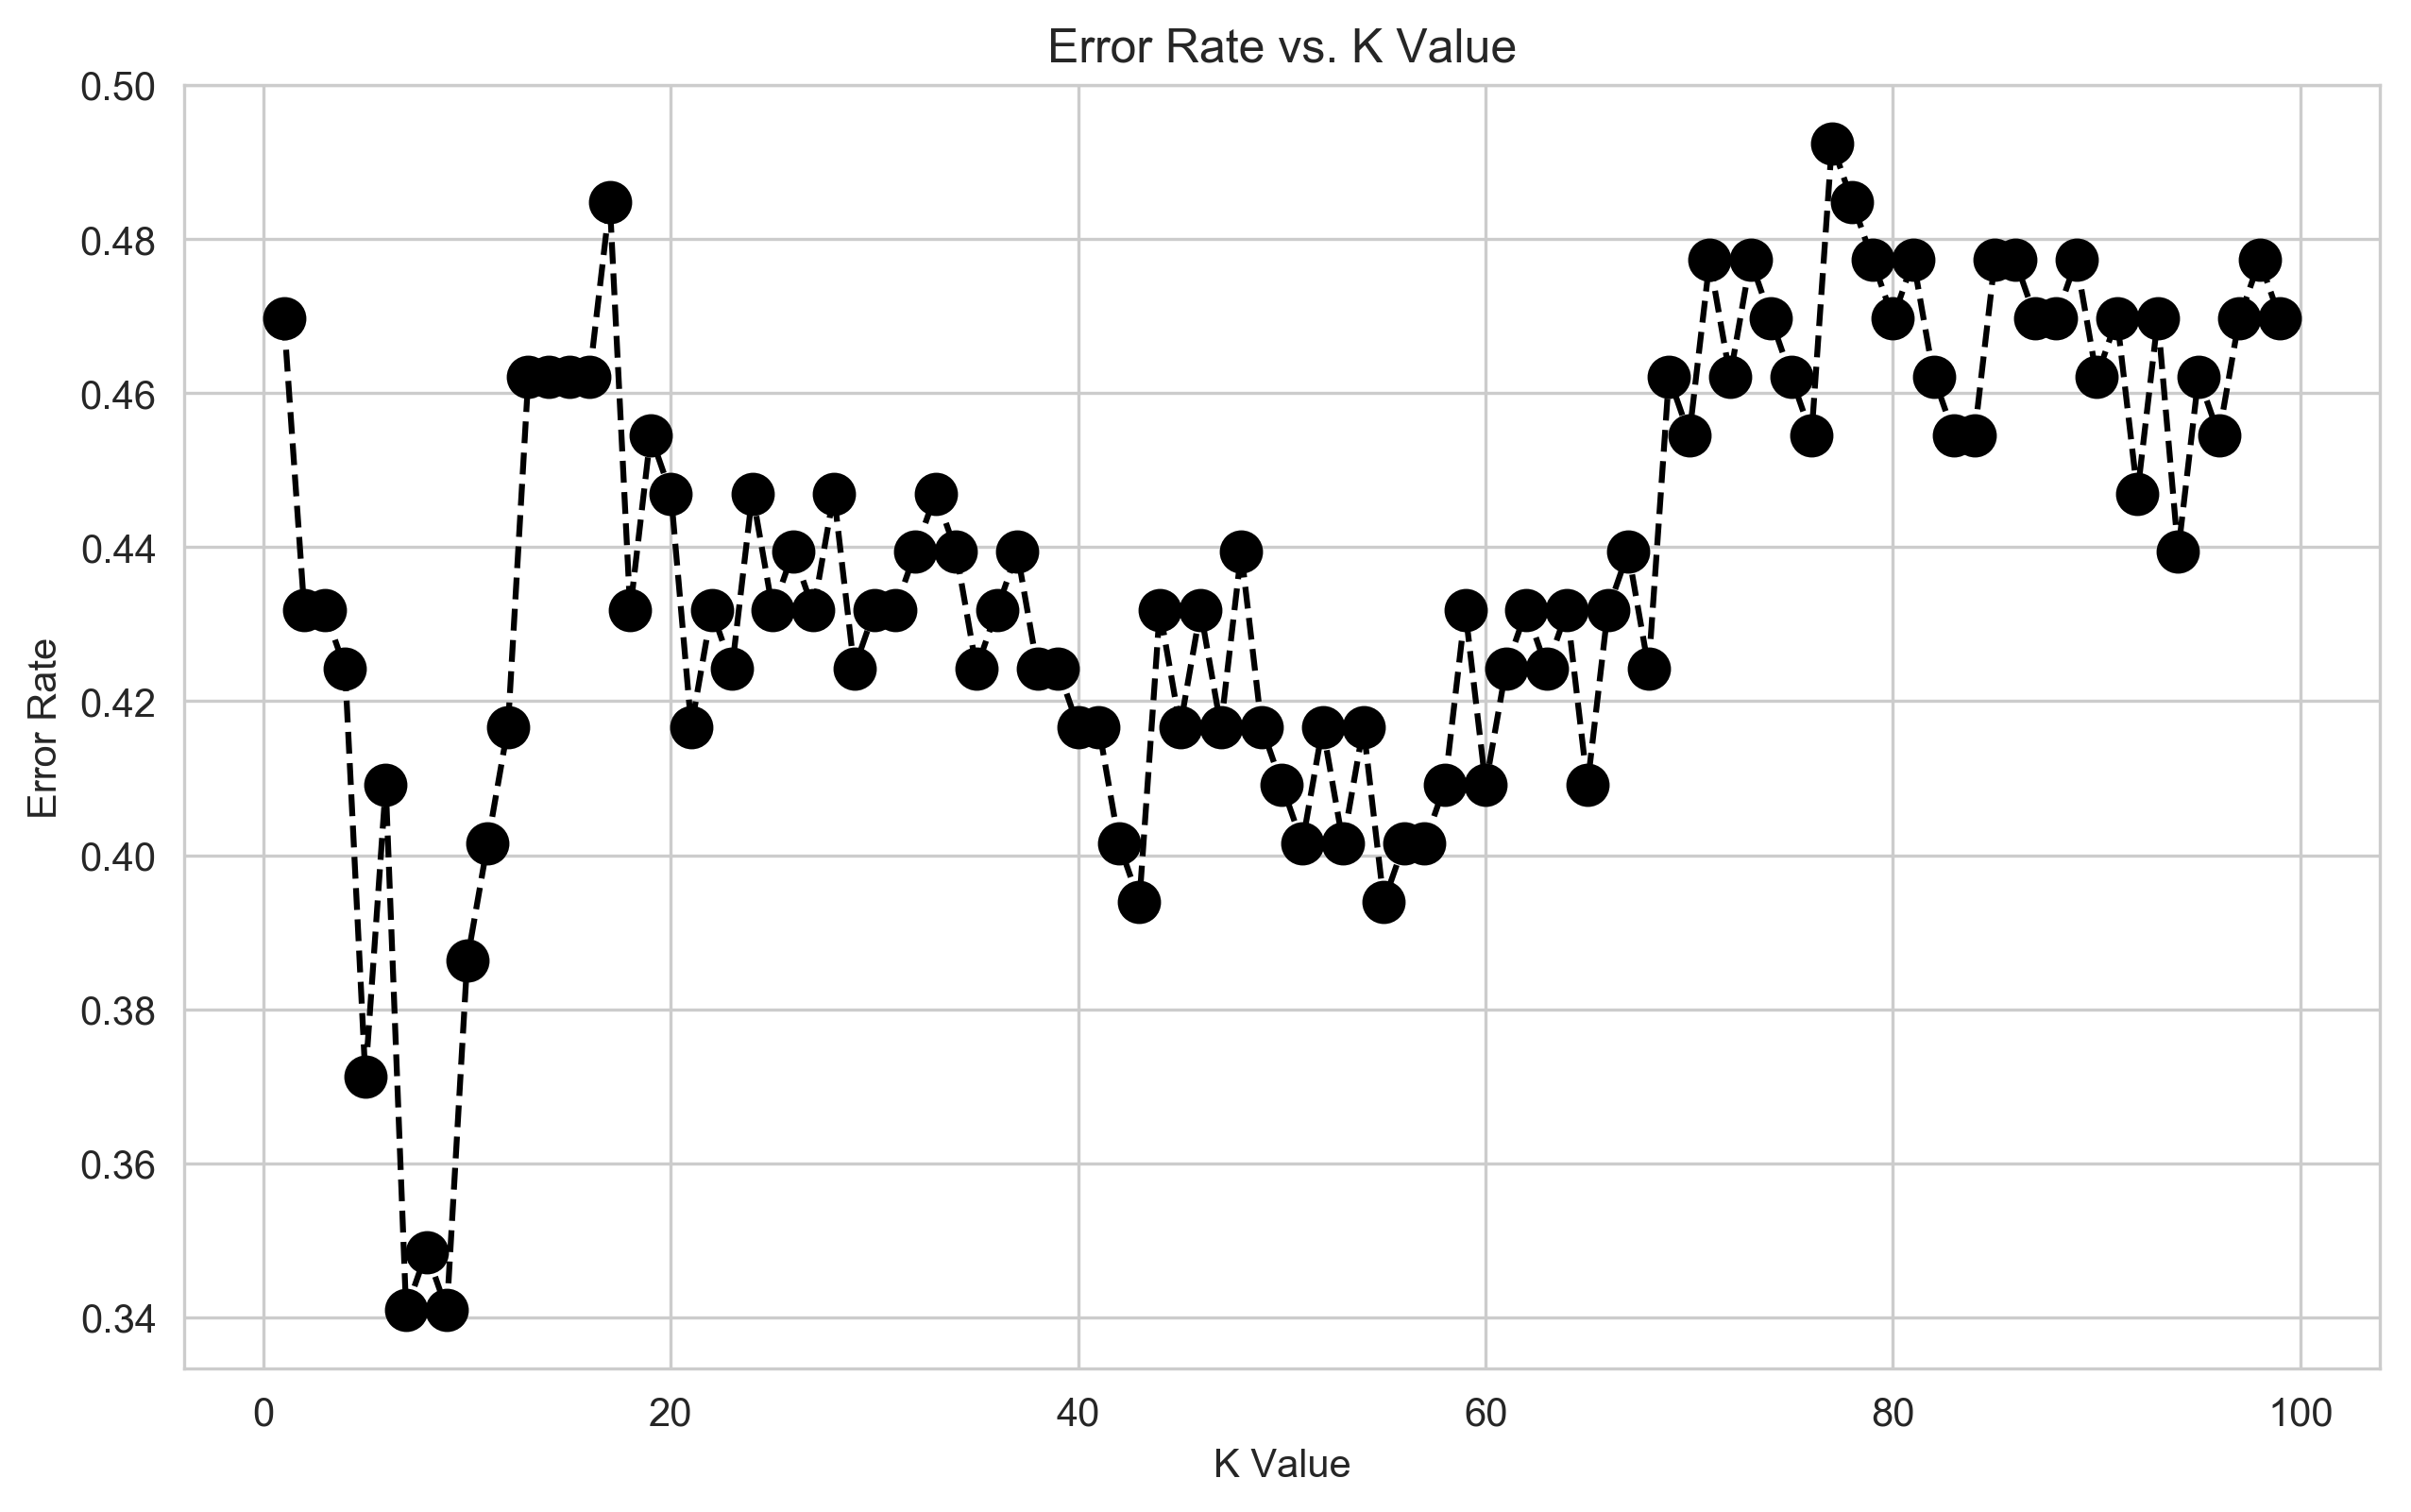

In [59]:
from sklearn.neighbors import KNeighborsClassifier
errors = []


for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),errors,color='black', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 18)
KNN_classifier.fit(X_train, y_train)
y_pred = KNN_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[42 22]
 [35 33]]


              precision    recall  f1-score   support

           0       0.55      0.66      0.60        64
           1       0.60      0.49      0.54        68

    accuracy                           0.57       132
   macro avg       0.57      0.57      0.57       132
weighted avg       0.57      0.57      0.57       132



## Training the Random Forest model and evaluation

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [10, 100,150,200,250,300,350,400]} 
RF_classifier = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=0)
RF_classifier.fit(X_train,y_train)
y_pred = RF_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))



[[34 30]
 [29 39]]


              precision    recall  f1-score   support

           0       0.54      0.53      0.54        64
           1       0.57      0.57      0.57        68

    accuracy                           0.55       132
   macro avg       0.55      0.55      0.55       132
weighted avg       0.55      0.55      0.55       132



## Training the SVM model and evaluation

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
SVM_classifier = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
SVM_classifier.fit(X_train,y_train)

y_pred = SVM_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[37 27]
 [28 40]]


              precision    recall  f1-score   support

           0       0.57      0.58      0.57        64
           1       0.60      0.59      0.59        68

    accuracy                           0.58       132
   macro avg       0.58      0.58      0.58       132
weighted avg       0.58      0.58      0.58       132



## Training the ANN model and evaluation

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

# 
model = Sequential()
model.add(Dense(units=60,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])



early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size= 64,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 526 samples, validate on 132 samples
Epoch 1/400
526/526 [==============================] - 5s 10ms/sample - loss: 0.8093 - accuracy: 0.5304 - val_loss: 0.7433 - val_accuracy: 0.4394
Epoch 2/400
526/526 [==============================] - 0s 317us/sample - loss: 0.8518 - accuracy: 0.4886 - val_loss: 0.7237 - val_accuracy: 0.4697
Epoch 3/400
526/526 [==============================] - 0s 343us/sample - loss: 0.8123 - accuracy: 0.5057 - val_loss: 0.7115 - val_accuracy: 0.4621
Epoch 4/400
526/526 [==============================] - 0s 349us/sample - loss: 0.7687 - accuracy: 0.5095 - val_loss: 0.7112 - val_accuracy: 0.5152
Epoch 5/400
526/526 [==============================] - 0s 358us/sample - loss: 0.7584 - accuracy: 0.5114 - val_loss: 0.7015 - val_accuracy: 0.5152
Epoch 6/400
526/526 [==============================] - 0s 373us/sample - loss: 0.7518 - accuracy: 0.5095 - val_loss: 0.6963 - val_accuracy: 0.5303
Epoch 7/400
526/526 [==============================] - 0s 411us/sample - 

In [64]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[42 22]
 [34 34]]
              precision    recall  f1-score   support

           0       0.55      0.66      0.60        64
           1       0.61      0.50      0.55        68

    accuracy                           0.58       132
   macro avg       0.58      0.58      0.57       132
weighted avg       0.58      0.58      0.57       132

